# **Employee Burnout Prediction**

# Importing  Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
import pickle
import os



# Loading Dataset

In [ ]:
data=pd.read_excel("/content/employee_burnout_analysis-AI.xlsx")

# Data Overview


In [ ]:
# @title
data.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3,7.0,6.9,0.52


In [ ]:
data.tail()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
22745,fffe31003500370039003100,2008-12-30,Female,Service,No,1,3.0,NaN,0.41
22746,fffe33003000350031003800,2008-01-19,Female,Product,Yes,3,6.0,6.7,0.59
22747,fffe390032003000,2008-11-05,Male,Service,Yes,3,7.0,NaN,0.72
22748,fffe33003300320036003900,2008-01-10,Female,Service,No,2,5.0,5.9,0.52
22749,fffe3400350031003800,2008-01-06,Male,Product,No,3,6.0,7.8,0.61


In [ ]:
data.describe()

,Date of Joining,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
count,22750,22750.000000,21369.000000,20633.000000,21626.000000
mean,2008-07-01 09:28:05.274725120,2.178725,4.481398,5.728188,0.452005
min,2008-01-01 00:00:00,0.000000,1.000000,0.000000,0.000000
25%,2008-04-01 00:00:00,1.000000,3.000000,4.600000,0.310000
50%,2008-07-02 00:00:00,2.000000,4.000000,5.900000,0.450000
75%,2008-09-30 00:00:00,3.000000,6.000000,7.100000,0.590000
max,2008-12-31 00:00:00,5.000000,10.000000,10.000000,1.000000
std,NaN,1.135145,2.047211,1.920839,0.198226


In [ ]:
data.shape

(22750, 9)

In [ ]:
data.size

204750

In [ ]:
data.columns.tolist()

['Employee ID',
 'Date of Joining',
 'Gender',
 'Company Type',
 'WFH Setup Available',
 'Designation',
 'Resource Allocation',
 'Mental Fatigue Score',
 'Burn Rate']

In [ ]:
data.nunique()

,0
Employee ID,22750
Date of Joining,366
Gender,2
Company Type,2
WFH Setup Available,2
Designation,6
Resource Allocation,10
Mental Fatigue Score,101
Burn Rate,101


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Employee ID           22750 non-null  object        
 1   Date of Joining       22750 non-null  datetime64[ns]
 2   Gender                22750 non-null  object        
 3   Company Type          22750 non-null  object        
 4   WFH Setup Available   22750 non-null  object        
 5   Designation           22750 non-null  int64         
 6   Resource Allocation   21369 non-null  float64       
 7   Mental Fatigue Score  20633 non-null  float64       
 8   Burn Rate             21626 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 1.6+ MB


In [ ]:
data.isnull().sum()

,0
Employee ID,0
Date of Joining,0
Gender,0
Company Type,0
WFH Setup Available,0
Designation,0
Resource Allocation,1381
Mental Fatigue Score,2117
Burn Rate,1124


In [ ]:
data.isnull().sum().values.sum()

4622

# Exploratory Data Analysis

Correlation

There are NaN values on our target ("Burn Rate") and also in Resource Allocation and Mental Fatigue Score columns. As we are going to perform supervised linear regression, our target variable is needed to do so.

In [ ]:
data.corr(numeric_only=True)['Burn Rate'][:-1]

,Burn Rate
Designation,0.737556
Resource Allocation,0.856278
Mental Fatigue Score,0.944546


These two variables resourse allocation,mfs are strongly correlated with target variable, therefore , important to estimate it.

Data Visualization

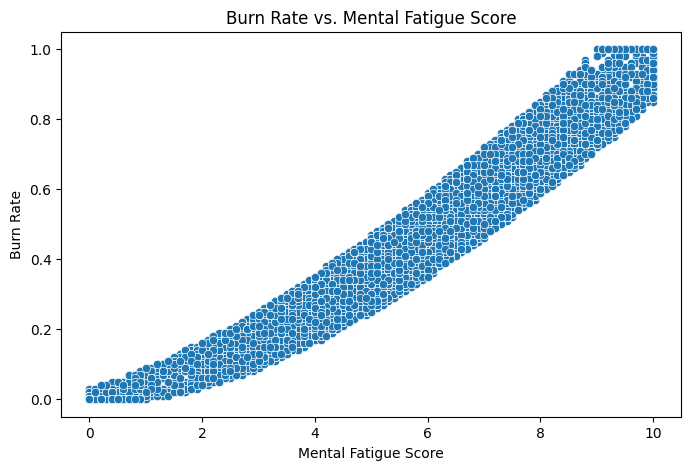

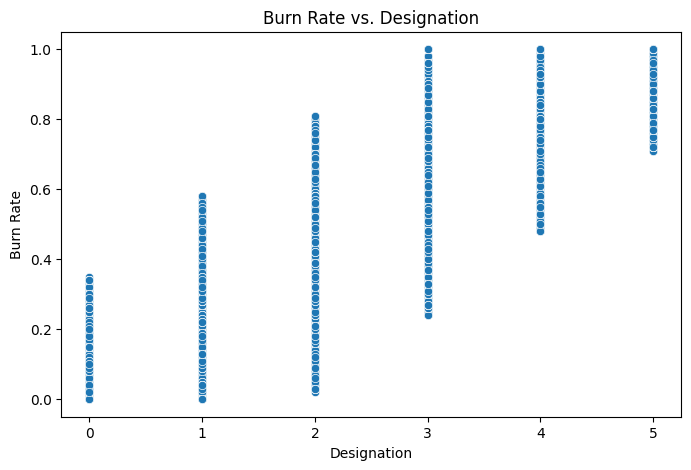

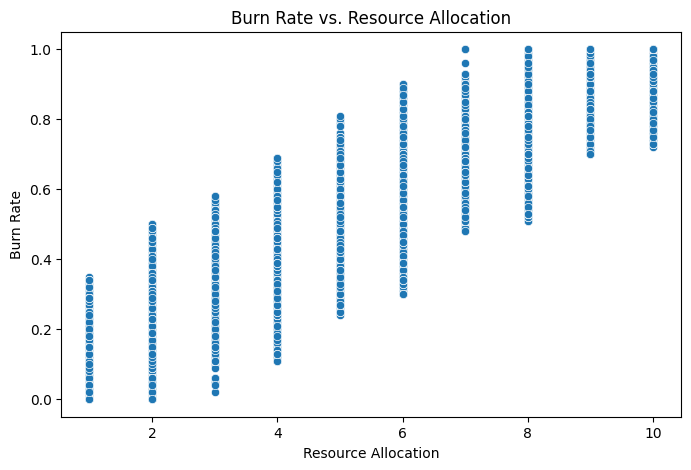

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Mental Fatigue Score', y='Burn Rate', data=data)
plt.title('Burn Rate vs. Mental Fatigue Score')
plt.show()

# Plot Burn Rate vs. Designation
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Designation', y='Burn Rate', data=data)
plt.title('Burn Rate vs. Designation')
plt.show()

# Plot Burn Rate vs. Resource Allocation
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Resource Allocation', y='Burn Rate', data=data)
plt.title('Burn Rate vs. Resource Allocation')
plt.show()

Drop off all observations with NaN values of our dataframe.

In [ ]:
data=data.dropna()

In [ ]:
data.shape

(18590, 9)

Inspect object types

In [ ]:
data.dtypes

,0
Employee ID,object
Date of Joining,datetime64[ns]
Gender,object
Company Type,object
WFH Setup Available,object
Designation,int64
Resource Allocation,float64
Mental Fatigue Score,float64
Burn Rate,float64


In [ ]:
data_obj = data.select_dtypes(object)
# prints a dictionary of max 10 unique values for each non-numeric column
pprint({ c : data_obj[c].unique()[:10] for c in data_obj.columns})

{'Company Type': array(['Service', 'Product'], dtype=object),
 'Employee ID': array(['fffe32003000360033003200', 'fffe3700360033003500',
       'fffe32003400380032003900', 'fffe31003900340031003600',
       'fffe3300350037003500', 'fffe33003300340039003100',
       'fffe32003600320037003400', 'fffe33003100330032003700',
       'fffe3400310035003800', 'fffe33003100330036003300'], dtype=object),
 'Gender': array(['Female', 'Male'], dtype=object),
 'WFH Setup Available': array(['No', 'Yes'], dtype=object)}


 Drop unnecessary columns
The employees ID doesn't provide any
useful information and, therefore, twe can drop it.

In [ ]:
data = data.drop('Employee ID', axis = 1)

# Feature Engineering

Convert Date of Joining to days since 2008-01-01

In [ ]:
reference_date = pd.to_datetime(["2008-01-01"] * len(data))
data["Days_Worked"] = data['Date of Joining'].astype("datetime64[ns]").sub(reference_date).dt.days
data.Days_Worked

,Days_Worked
0,273
1,334
3,307
4,205
5,330
...,...
22743,349
22744,147
22746,18
22748,9


Check correlation with burnrate

In [ ]:
data.corr(numeric_only=True)['Burn Rate'][:]

,Burn Rate
Designation,0.736412
Resource Allocation,0.855005
Mental Fatigue Score,0.944389
Burn Rate,1.000000
Days_Worked,0.000309


We observed that there is no strong correlation between Date of Joining and Burn Rate.So, we are dropping the column Date of Joining.

In [ ]:
data = data.drop(['Date of Joining','Days_Worked'], axis = 1)

Now analysing the categorical variables

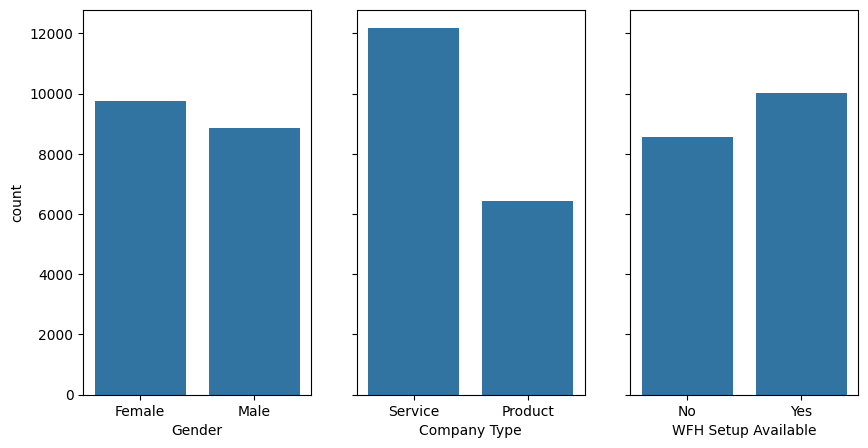

In [ ]:
cat_columns = data.select_dtypes(object).columns
fig, ax = plt.subplots(nrows=1, ncols=len(cat_columns), sharey=True, figsize=(10, 5))
for i, c in enumerate(cat_columns):
    sns.countplot(x=c, data=data, ax=ax[i])
plt.show()

The number of observations of each category on each variable is equally distributed, except to the Company_Type where the number of service jobs its almost twice that of product ones.

# One-Hot Encoding

Next, what we are going to do is to parse this classes to categorical values using the sparse representation with unit distance between classes known as one-hot encoding. Since all our categorical features are binary, and we don't want to represent multilinearity in our data, this classes can be represented with one dimension for each feature.

In [ ]:
data = pd.get_dummies(data, columns=['Company Type', 'WFH Setup Available','Gender'], drop_first=True)
data = data.applymap(lambda x: int(x) if isinstance(x, bool) else x)

<ipython-input-24-09513b43e449>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data = data.applymap(lambda x: int(x) if isinstance(x, bool) else x)


Now, our dataframe doesn't have non-numeric values and all previous them are represented with just a numeric column. Before continuing to use data pipelines and models to fit our data, we need first to split our dataframe in our input features X and target value y.

In [ ]:
data.sample()

,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,Company Type_Service,WFH Setup Available_Yes,Gender_Male
1726,2,5.0,6.0,0.43,1,1,0


# **Preprocessing**

In [ ]:
# Split data into X and y
y = data['Burn Rate']
X = data.drop('Burn Rate', axis=1)

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)

# Scale X
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns )

In [ ]:
X_train

,Designation,Resource Allocation,Mental Fatigue Score,Company Type_Service,WFH Setup Available_Yes,Gender_Male
8977,0.723327,0.250185,-0.061773,0.724706,-1.082297,1.051505
14115,-0.159330,0.250185,-0.941481,0.724706,-1.082297,-0.951018
8797,0.723327,0.250185,0.973179,0.724706,-1.082297,-0.951018
1173,-1.041987,-1.214568,-0.579248,-1.379869,-1.082297,-0.951018
1941,-0.159330,0.738436,1.180169,-1.379869,0.923961,1.051505
...,...,...,...,...,...,...
13453,0.723327,1.226687,1.645897,-1.379869,0.923961,-0.951018
21179,0.723327,0.250185,-1.044976,0.724706,0.923961,1.051505
6327,0.723327,0.250185,0.093470,0.724706,-1.082297,1.051505
14933,-0.159330,0.250185,0.714441,0.724706,-1.082297,1.051505


In [ ]:
X_test

,Designation,Resource Allocation,Mental Fatigue Score,Company Type_Service,WFH Setup Available_Yes,Gender_Male
14239,-0.159330,-0.238066,-0.010025,0.724706,0.923961,-0.951018
15056,-1.041987,-0.726317,-1.562452,0.724706,0.923961,-0.951018
12187,1.605983,0.738436,0.507451,-1.379869,0.923961,1.051505
248,0.723327,0.250185,-0.010025,-1.379869,0.923961,-0.951018
12710,-0.159330,0.250185,-0.217015,0.724706,0.923961,1.051505
...,...,...,...,...,...,...
21709,1.605983,0.738436,1.128421,0.724706,-1.082297,-0.951018
2760,-0.159330,0.250185,-0.424005,0.724706,0.923961,-0.951018
20275,-1.041987,-0.726317,-0.165268,0.724706,0.923961,-0.951018
13124,-0.159330,-0.238066,0.869683,0.724706,-1.082297,-0.951018


In [ ]:
y_train

,Burn Rate
8977,0.41
14115,0.34
8797,0.61
1173,0.35
1941,0.61
...,...
13453,0.78
21179,0.30
6327,0.42
14933,0.54


In [ ]:
y_test

,Burn Rate
14239,0.38
15056,0.21
12187,0.65
248,0.40
12710,0.31
...,...
21709,0.66
2760,0.37
20275,0.36
13124,0.55


# **Model Building**

# Linear Regression

In [ ]:
#from sklearn.linear_model import LinearRegression

# Create an instance of the LinearRegression class
linear_regression_model = LinearRegression()

# Train the model
linear_regression_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
#Linear Regressing Model Performance Metrics

print("Linear Regression Model Performance Metrics:\n")
# Make predictions on the test set

y_pred = linear_regression_model.predict(X_test)
# metrics
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared Score:", r2)



Linear Regression Model Performance Metrics:

Mean Squared Error: 0.0031569779113610717
Root Mean Squared Error: 0.0561869905882231
Mean Absolute Error: 0.04595032032644773
R-squared Score: 0.918822674247248


Feature names

In [ ]:
feature_names = X.columns.tolist()
feature_names

['Designation',
 'Resource Allocation',
 'Mental Fatigue Score',
 'Company Type_Service',
 'WFH Setup Available_Yes',
 'Gender_Male']

# Cross Validation
Perform cross-validation to validate the model's robustness.

In [ ]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(linear_regression_model, X, y, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = (-cv_scores)**0.5
print("Cross-Validation RMSE Scores:", cv_rmse_scores)
print("Mean Cross-Validation RMSE:", cv_rmse_scores.mean())

Cross-Validation RMSE Scores: [0.0557549  0.05582352 0.05523128 0.05605764 0.05592962]
Mean Cross-Validation RMSE: 0.05575939095000748


# Residual Analysis
Analyze the residuals (differences between predicted and actual values) to ensure that they are randomly distributed. This can help verify the assumptions of the linear regression model.

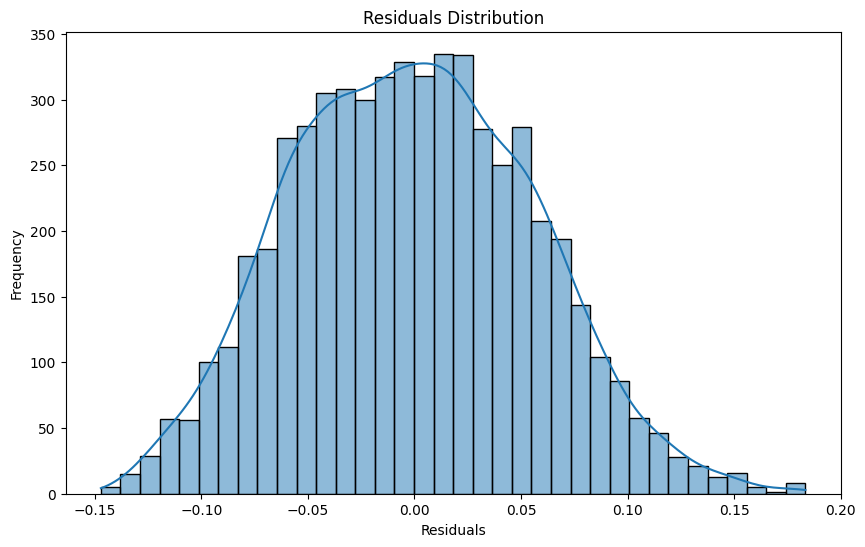

In [ ]:
# Residuals
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()